# Crime Against Women (A state wise Investigation)

By~ Arka Das

Goals:
*  Identify states with highest crime against women
*   Cluster states based on crime patterns
*   Identify which states dominate each crime type


















In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
crime_df=pd.read_csv('/content/drive/MyDrive/CrimesOnWomen_ML/CrimesOnWomenData.csv')
desc_df=pd.read_csv('/content/drive/MyDrive/CrimesOnWomen_ML/description.csv')

## Dataset Description

The dataset contains state-wise crime data across multiple categories related to crimes against women.  
The file `description.csv` is used to understand the meaning of each column, including:
- Rape
- Kidnapping and Assault
- Dowry Deaths
- Assault against Women
- Assault on Modesty
- Domestic Violence
- Women Trafficking


In [110]:
crime_df.head(), desc_df.head()

(   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
 0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
 1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
 2           2              ASSAM  2001   817  1070   59   850     4  1248   0
 3           3              BIHAR  2001   888   518  859   562    21  1558  83
 4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0,
    Unnamed: 0 Column Names         Explanation
 0           0        State               State
 1           1         Year                Year
 2           2         Rape   No. of Rape cases
 3           3          K&A  Kidnap And Assault
 4           4           DD        Dowry Deaths)

In [111]:
crime_df.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

In [112]:
crime_df=crime_df.rename(columns={'K&A':"Kidnap_Assault", "AoW":"Assault_Women","DV":"Domestic_Violence","AoM":"Assault_Modesty","WT":"Women_Trafficing","DD":"Dowry_Deaths"})

In [113]:
crime_df.head()

,Unnamed: 0,State,Year,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [114]:
crime_df=crime_df.drop(columns=["Unnamed: 0"],errors="ignore")
crime_df.head()

,State,Year,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [115]:
newCrime_df=crime_df.groupby('State').sum(numeric_only=True)
newCrime_df.head()

,Year,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
State,,,,,,,,
A & N ISLANDS,20055,84,58,4,182,36,111,0
A & N Islands,22176,340,305,9,376,99,254,10
ANDHRA PRADESH,20055,10696,11921,5112,42334,28759,92242,17
ARUNACHAL PRADESH,20055,412,440,1,666,16,123,0
ASSAM,20055,12762,16368,1015,10587,99,27735,4


## Data Cleaning and Preparation

The dataset was cleaned by standardizing state names, removing unnecessary columns, and aggregating crime counts at the state level. The data was prepared both in raw form (for absolute comparisons) and scaled form (for pattern analysis).


In [116]:
crime_df["State"]=crime_df["State"].str.strip().str.title()

In [117]:
crime_df=crime_df.drop(columns=["Year"],errors="ignore")

In [118]:
newCrime_df=crime_df.groupby("State").sum()
newCrime_df.head()

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
State,,,,,,,
A & N Islands,424,363,13,558,135,365,10
Andhra Pradesh,23424,21707,8165,92084,54684,188511,2548
Arunachal Pradesh,1153,1272,4,1584,97,705,7
Assam,32190,71462,2757,47115,2698,135415,343
Bihar,21006,77687,24428,9953,800,55187,825


In [119]:
newCrime_df.columns

Index(['Rape', 'Kidnap_Assault', 'Dowry_Deaths', 'Assault_Women',
       'Assault_Modesty', 'Domestic_Violence', 'Women_Trafficing'],
      dtype='object')

## States with Highest Crime Against Women

Total crime counts were computed by summing all crime categories for each state. The top states were identified and visualized to highlight regions with the highest reported crime burden.


In [120]:
newCrime_df["Total_Crimes"]=newCrime_df.sum(axis=1)
newCrime_df.head()

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing,Total_Crimes
State,,,,,,,,
A & N Islands,424,363,13,558,135,365,10,1868
Andhra Pradesh,23424,21707,8165,92084,54684,188511,2548,391123
Arunachal Pradesh,1153,1272,4,1584,97,705,7,4822
Assam,32190,71462,2757,47115,2698,135415,343,291980
Bihar,21006,77687,24428,9953,800,55187,825,189886


In [121]:
Top_States=newCrime_df.sort_values(by="Total_Crimes",ascending=False)
Top_States.head(10)

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing,Total_Crimes
State,,,,,,,,
Uttar Pradesh,45694,133856,40615,99650,46524,163062,333,529734
Madhya Pradesh,72808,57485,13316,152000,21631,95521,396,413157
West Bengal,29486,51742,8075,51014,5750,262235,940,409242
Andhra Pradesh,23424,21707,8165,92084,54684,188511,2548,391123
Rajasthan,43799,55320,7769,67855,2365,201488,668,379264
Maharashtra,39252,46522,5756,107519,30693,133357,2533,365632
Assam,32190,71462,2757,47115,2698,135415,343,291980
Kerala,24184,14056,1525,69081,8873,84277,990,202986
Odisha,24810,29847,7521,83473,7631,41222,270,194774


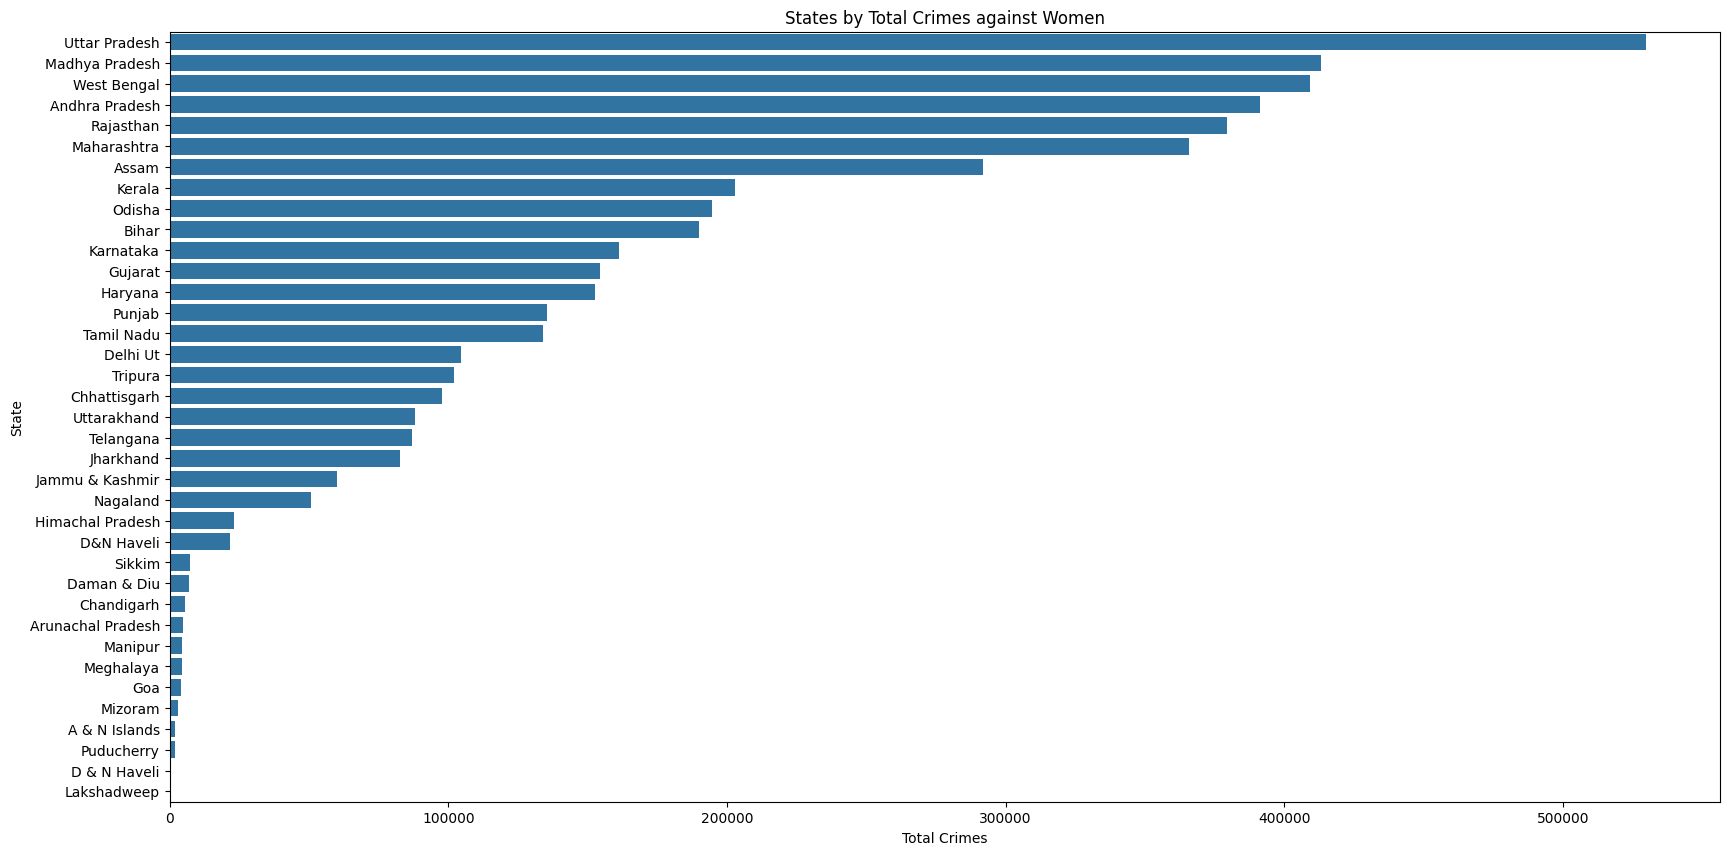

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(x=Top_States["Total_Crimes"], y=Top_States.index)
plt.title("States by Total Crimes against Women")
plt.xlabel("Total Crimes")
plt.ylabel("State")
plt.show()

# **Top 10 States with the Highest Crimes Against Women**

In [123]:
top10_df=Top_States.head(10)
top10_df

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing,Total_Crimes
State,,,,,,,,
Uttar Pradesh,45694,133856,40615,99650,46524,163062,333,529734
Madhya Pradesh,72808,57485,13316,152000,21631,95521,396,413157
West Bengal,29486,51742,8075,51014,5750,262235,940,409242
Andhra Pradesh,23424,21707,8165,92084,54684,188511,2548,391123
Rajasthan,43799,55320,7769,67855,2365,201488,668,379264
Maharashtra,39252,46522,5756,107519,30693,133357,2533,365632
Assam,32190,71462,2757,47115,2698,135415,343,291980
Kerala,24184,14056,1525,69081,8873,84277,990,202986
Odisha,24810,29847,7521,83473,7631,41222,270,194774


/tmp/ipython-input-1757150076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_df["Total_Crimes"], y=top10_df.index,palette="inferno")


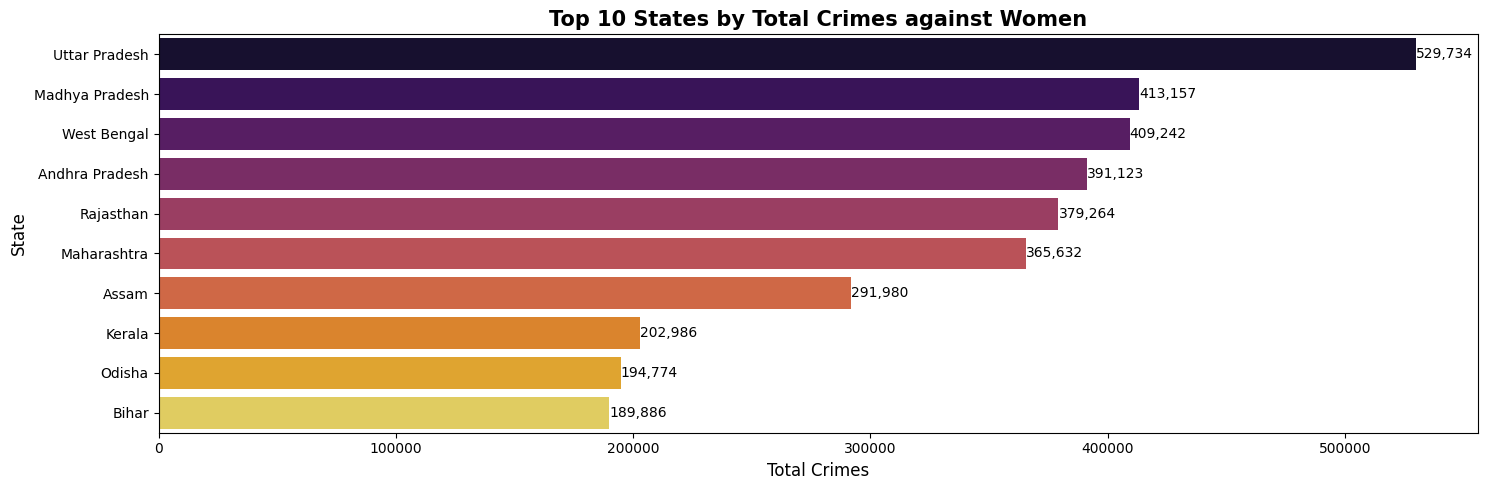

In [124]:
plt.figure(figsize=(15,5))
sns.barplot(x=top10_df["Total_Crimes"], y=top10_df.index,palette="inferno")
plt.title("Top 10 States by Total Crimes against Women",weight="bold",fontsize=15)
plt.xlabel("Total Crimes",fontsize=12)
plt.ylabel("State",fontsize=12)
for i, value in enumerate(top10_df["Total_Crimes"]):
    plt.text(value, i, f"{value:,}", va="center", fontsize=10)
plt.tight_layout()
plt.show()

The bar chart shows that Uttar Pradesh reports the highest total number of crimes against women, followed by West Bengal and Andhra Pradesh. These higher counts may be influenced by population size and reporting volume, as the analysis uses absolute crime counts rather than per-capita rates.

In [125]:
newNewCrime_df=newCrime_df.drop(columns=["Total_Crimes"])
newNewCrime_df.head()

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
State,,,,,,,
A & N Islands,424,363,13,558,135,365,10
Andhra Pradesh,23424,21707,8165,92084,54684,188511,2548
Arunachal Pradesh,1153,1272,4,1584,97,705,7
Assam,32190,71462,2757,47115,2698,135415,343
Bihar,21006,77687,24428,9953,800,55187,825


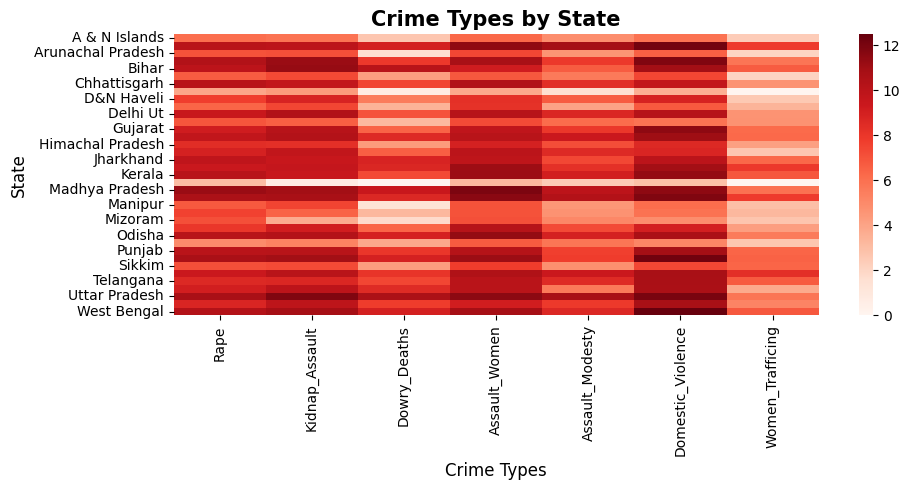

In [126]:
plt.figure(figsize=(10,5))
sns.heatmap(np.log1p(newNewCrime_df),cmap="Reds")
plt.title("Crime Types by State",fontsize=15,weight="bold")
plt.xlabel("Crime Types",fontsize=12)
plt.ylabel("State",fontsize=12)
plt.tight_layout()
plt.show()

## Crime Type Distribution Across States

To analyze how different crime types vary across states, a heatmap visualization was used. The data was normalized to enable comparison across crime categories with different scales.


In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(newNewCrime_df),columns=newNewCrime_df.columns,index=newNewCrime_df.index)

scaled_df["Total_Crimes"]=scaled_df.sum(axis=1)
scaled_df=scaled_df.sort_values(by="Total_Crimes",ascending=False)
scaled_df=scaled_df.drop(columns=["Total_Crimes"])
scaled_df.head()

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
State,,,,,,,
Uttar Pradesh,0.627494,1.000000,1.000000,0.655540,0.850768,0.621792,0.082405
Andhra Pradesh,0.321537,0.162161,0.201034,0.605756,1.000000,0.718845,0.630537
Madhya Pradesh,1.000000,0.429450,0.327859,1.000000,0.395519,0.364216,0.097996
Maharashtra,0.538990,0.347548,0.141721,0.707318,0.561247,0.508508,0.626825
West Bengal,0.404819,0.386545,0.198818,0.335518,0.105084,1.000000,0.232616


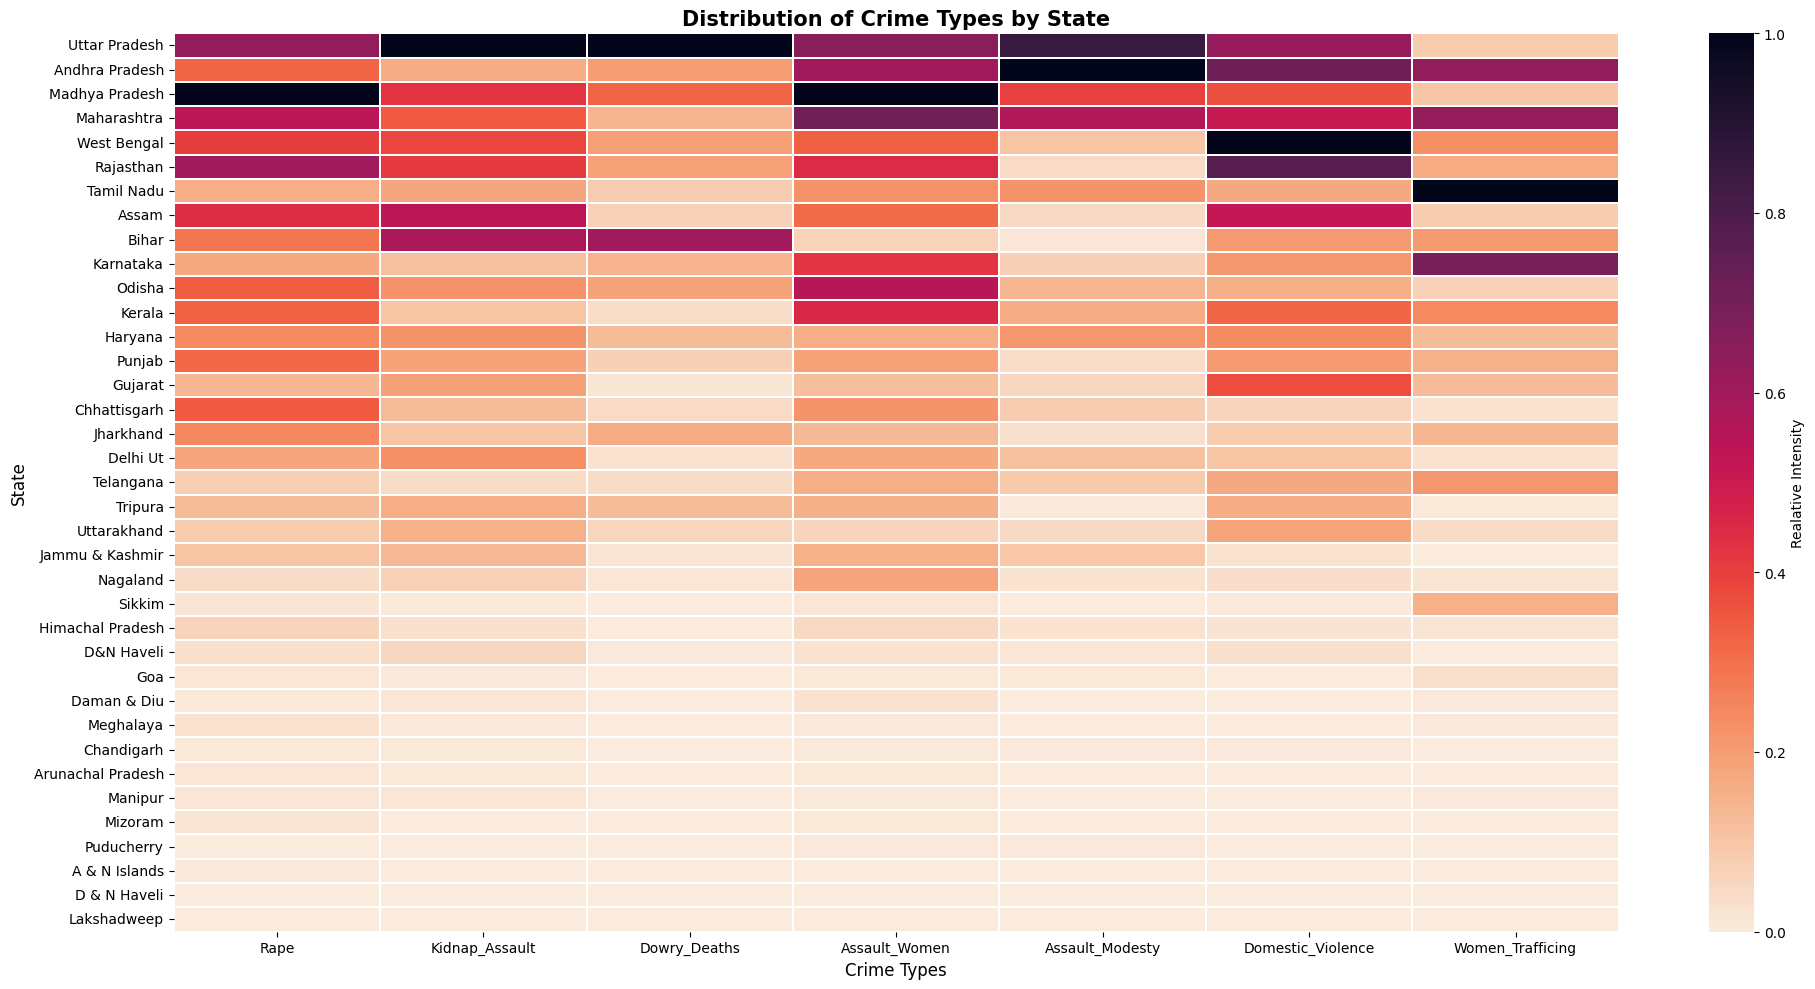

In [128]:
plt.figure(figsize=(20,10))
sns.heatmap(scaled_df,cmap="rocket_r",linewidths=0.3,linecolor="white",cbar_kws={"label":"Realative Intensity"})
plt.title("Distribution of Crime Types by State",fontsize=15,weight="bold")
plt.xlabel("Crime Types",fontsize=12)
plt.ylabel("State",fontsize=12)
plt.tight_layout()
plt.show()

Normalization was applied to compare relative crime intensity across states independent of absolute magnitude.

# Interpretation:
The heatmap illustrates the distribution of different crime types against women across Indian states. It is evident that Domestic Violence and Assault against Women account for the highest number of reported cases in most states, particularly in large and populous states such as Uttar Pradesh, West Bengal, and Andhra Pradesh. In contrast, crime categories like Women Trafficking and Dowry Deaths show comparatively lower reported counts across most regions. The variation in color intensity across states highlights that different states tend to dominate different crime categories, indicating region-specific crime patterns rather than uniform crime distribution.

# **Top 5 States by Individual Crime Categories**

This analysis identifies the top five states contributing the highest number of reported cases for each individual crime category against women. The results show that dominance varies significantly across crime types, with no single state leading in all categories. States such as Uttar Pradesh, West Bengal, and Andhra Pradesh frequently appear among the top contributors for high-volume crimes like domestic violence, kidnapping and assault, and assault against women. In contrast, crimes such as dowry deaths and women trafficking are concentrated in fewer states with relatively lower overall counts. This variation highlights that crime against women in India is not uniform in nature and is shaped by region-specific social and structural factors, emphasizing the need for targeted policy interventions rather than a one-size-fits-all approach.

In [129]:
topStatesPerCrime={}
for x in newNewCrime_df.columns:
  topStatesPerCrime[x]=newNewCrime_df[x].sort_values(ascending=False).head(5)

for x, y in topStatesPerCrime.items():
  print(f"\nTop 5 states for {x}: ")
  print(y)


Top 5 states for Rape: 
State
Madhya Pradesh    72808
Uttar Pradesh     45694
Rajasthan         43799
Maharashtra       39252
Assam             32190
Name: Rape, dtype: int64

Top 5 states for Kidnap_Assault: 
State
Uttar Pradesh     133856
Bihar              77687
Assam              71462
Madhya Pradesh     57485
Rajasthan          55320
Name: Kidnap_Assault, dtype: int64

Top 5 states for Dowry_Deaths: 
State
Uttar Pradesh     40615
Bihar             24428
Madhya Pradesh    13316
Andhra Pradesh     8165
West Bengal        8075
Name: Dowry_Deaths, dtype: int64

Top 5 states for Assault_Women: 
State
Madhya Pradesh    152000
Maharashtra       107519
Uttar Pradesh      99650
Andhra Pradesh     92084
Odisha             83473
Name: Assault_Women, dtype: int64

Top 5 states for Assault_Modesty: 
State
Andhra Pradesh    54684
Uttar Pradesh     46524
Maharashtra       30693
Madhya Pradesh    21631
Tamil Nadu        12084
Name: Assault_Modesty, dtype: int64

Top 5 states for Domestic_Violenc

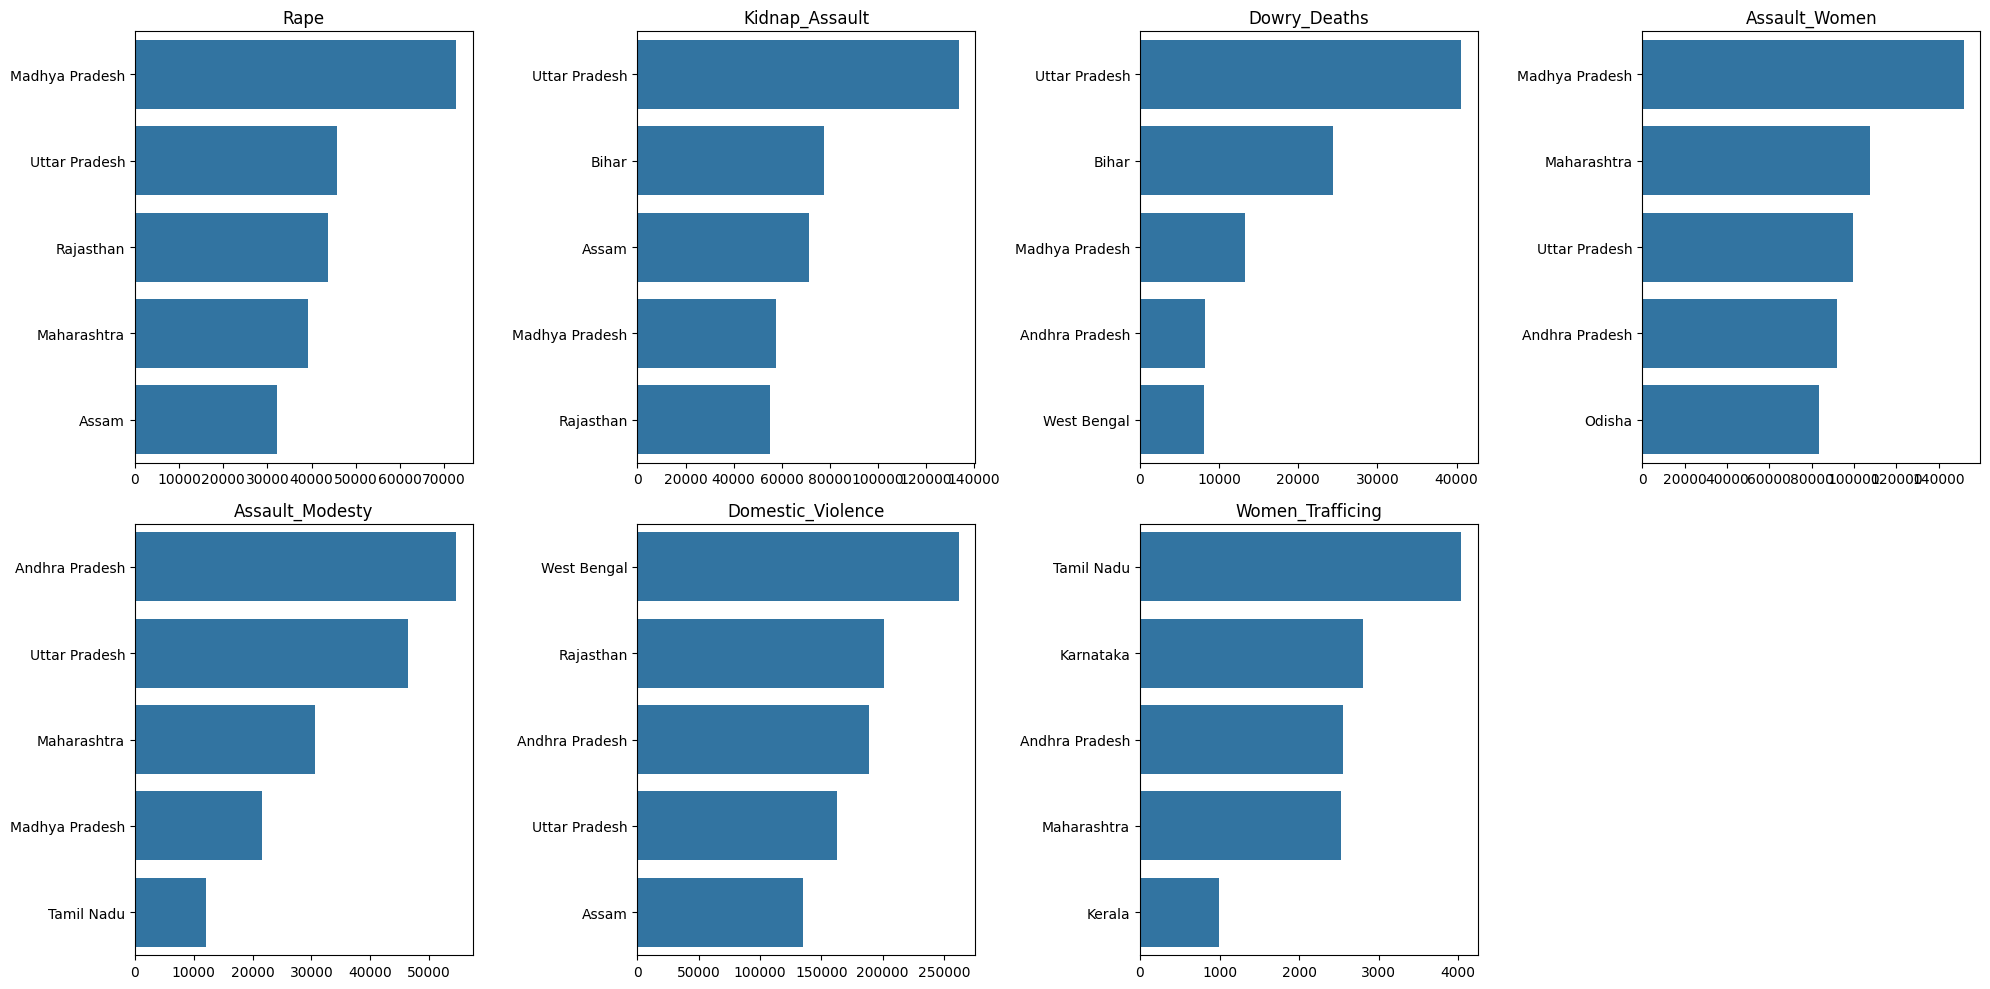

In [130]:
plt.figure(figsize=(20,10))

for i, crime in enumerate(newNewCrime_df.columns, 1):
    plt.subplot(2, 4, i)
    top5 = newNewCrime_df[crime].sort_values(ascending=False).head(5)
    sns.barplot(x=top5.values, y=top5.index)
    plt.title(crime)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


# **Clustering of States Based on Crime Patterns**

To identify structural similarities between states, K-Means clustering was applied to normalized crime data. PCA was used to visualize cluster separation.


In [131]:
from sklearn.cluster import KMeans

In [132]:
kmeans=KMeans(n_clusters=3, random_state=42)
clusters=kmeans.fit_predict(scaled_df)
clustered_df=scaled_df.copy()
clustered_df["Cluster"]=clusters
clustered_df.head()

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing,Cluster
State,,,,,,,,
Uttar Pradesh,0.627494,1.000000,1.000000,0.655540,0.850768,0.621792,0.082405,2
Andhra Pradesh,0.321537,0.162161,0.201034,0.605756,1.000000,0.718845,0.630537,0
Madhya Pradesh,1.000000,0.429450,0.327859,1.000000,0.395519,0.364216,0.097996,2
Maharashtra,0.538990,0.347548,0.141721,0.707318,0.561247,0.508508,0.626825,0
West Bengal,0.404819,0.386545,0.198818,0.335518,0.105084,1.000000,0.232616,0


In [133]:
clustered_df["Cluster"].value_counts()

,count
Cluster,
1,25
0,10
2,2


In [134]:
cluster_summary=clustered_df.groupby("Cluster").mean()
cluster_summary

,Rape,Kidnap_Assault,Dowry_Deaths,Assault_Women,Assault_Modesty,Domestic_Violence,Women_Trafficing
Cluster,,,,,,,
0,0.360371,0.304154,0.185493,0.412063,0.236650,0.458823,0.394878
1,0.084735,0.070680,0.029035,0.074625,0.034520,0.068292,0.044246
2,0.813747,0.714725,0.663930,0.827770,0.623144,0.493004,0.090200


In [135]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(pca_result, columns=["PC1","PC2"],index=scaled_df.index)
pca_df["Cluster"]=clusters

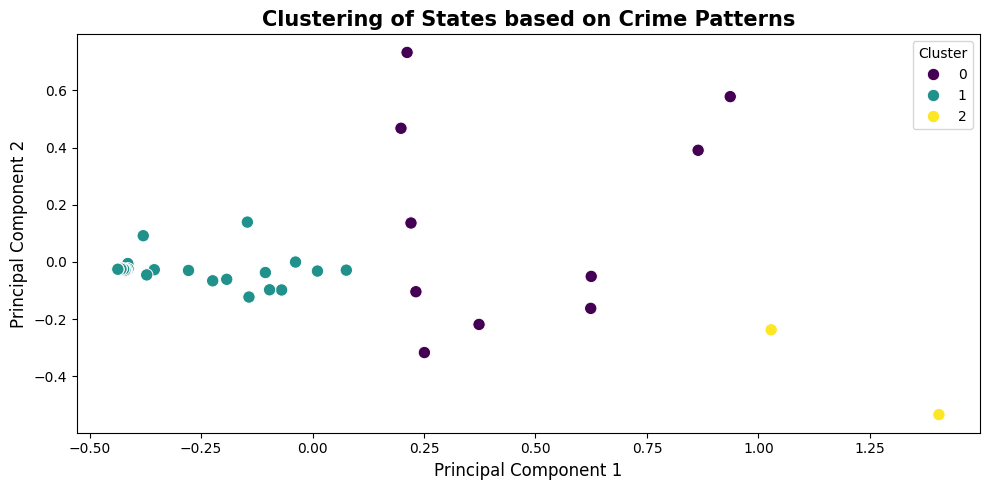

In [136]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pca_df,x="PC1",y="PC2",hue="Cluster",palette="viridis",s=80)
plt.title("Clustering of States based on Crime Patterns",fontsize=15,weight="bold")
plt.xlabel("Principal Component 1",fontsize=12)
plt.ylabel("Principal Component 2",fontsize=12)
plt.legend(loc="upper right",title="Cluster")
plt.tight_layout()
plt.show()

# **Clustering Interpretation:**
The K-Means clustering analysis groups Indian states into three distinct clusters based on similarities in crime patterns against women. One cluster consists of a small number of states exhibiting very high relative intensity across multiple crime categories, indicating extreme or unique crime profiles. A second cluster represents states with moderately high but more balanced crime patterns, while the largest cluster contains states with comparatively lower relative intensity across most crime types. This demonstrates that states differ not only in total crime counts but also in the composition of crimes, highlighting structured regional crime patterns rather than uniform national trends.



- **Cluster 0**: States with consistently high crime intensity across multiple categories
- **Cluster 1**: States with moderate crime levels and balanced crime composition
- **Cluster 2**: States with low reported crime across most categories

These clusters highlight structural differences in crime patterns rather than absolute counts.


In [137]:
pca = PCA(n_components=2)
pca.fit(scaled_df)
loadings = pd.DataFrame(pca.components_.T,index=scaled_df.columns,columns=["PC1", "PC2"])
loadings


,PC1,PC2
Rape,0.419927,-0.199264
Kidnap_Assault,0.364700,-0.378146
Dowry_Deaths,0.296946,-0.323191
Assault_Women,0.457448,0.082673
Assault_Modesty,0.376915,0.211877
Domestic_Violence,0.444662,0.027069
Women_Trafficing,0.231149,0.812643


# **PCA Interpretation:**
Analysis of PCA loadings shows that Principal Component 1 is primarily influenced by high-volume crime categories such as domestic violence, assault against women, kidnapping and assault, and rape. This suggests that PC1 captures overall crime intensity across states. Principal Component 2 is influenced more strongly by categories such as dowry deaths, women trafficking, and assault on modesty, indicating variation in crime composition rather than total crime volume. Together, these components separate states based on both the magnitude and structure of crimes against women.

# **Summary of Insights**

This exploratory data analysis examines state-wise crime against women in India using the provided dataset, with crime categories interpreted using description.csv. The dataset was cleaned and aggregated to obtain total crime counts per state, and unnecessary columns were removed to focus on meaningful variables. State names were standardized, and data was prepared for both absolute and relative pattern analysis.

Analysis of total reported crimes reveals that a small number of states contribute disproportionately to overall crime against women. States such as Uttar Pradesh, West Bengal, Andhra Pradesh, Madhya Pradesh, and Rajasthan consistently rank among the highest in total reported cases. A bar chart visualization clearly highlights this concentration, emphasizing the role of large and populous states in overall crime statistics.

Further examination of individual crime categories shows that dominance varies significantly by crime type. While some states appear repeatedly among the top contributors for crimes such as domestic violence, assault against women, and kidnapping and assault, other categories like dowry deaths and women trafficking are concentrated in fewer states with comparatively lower case counts. Heatmap visualizations reveal that crime patterns are not uniform across regions, indicating state-specific crime profiles rather than a single national trend.

To explore structural similarities, states were clustered using K-Means on normalized crime data. The clustering results group states into three distinct clusters representing high-intensity, moderate, and low-intensity crime patterns. PCA visualization confirms meaningful separation between clusters, driven by both overall crime intensity and differences in crime composition. Overall, the analysis demonstrates that crime against women in India varies not only in magnitude but also in structure, highlighting the importance of region-specific and crime-specific policy interventions.